In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
#@title Import revelant modules and install Facets
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [ ]:
from zipfile import ZipFile

test_file_name = "archive.zip"

with ZipFile(test_file_name, 'r') as zip:
    zip.printdir()
    zip.extractall() 

COLUMNS=["enrollee_id","city","city_development_index","gender","relevent_experience",
         "enrolled_university","education_level","major_discipline","experience",
         "company_size","company_type","last_new_job","training_hours","target"]

aug_train='/content/aug_train.csv'
aug_test='/content/aug_test.csv'

train_df = pd.read_csv(aug_train, names=COLUMNS, sep=r'\s*,\s*', 
                       engine='python', na_values="?")
test_df = pd.read_csv(aug_test, names=COLUMNS, sep=r'\s*,\s*', skiprows=[0],
                      engine='python', na_values="?")

File Name                                             Modified             Size
aug_test.csv                                   2021-09-11 15:16:58       210504
aug_train.csv                                  2021-09-11 15:16:58      1961145
sample_submission.csv                          2021-09-11 15:16:58        20612


In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(train_df.size)

,Total,%
company_type,6140,32.0
company_size,5938,31.0
gender,4508,23.5
major_discipline,2813,14.7
education_level,460,2.4
...,...,...
training_hours,0,0.0
relevent_experience,0,0.0
city_development_index,0,0.0
city,0,0.0


In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 5000 #@param
  
train_dive = train_df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [ ]:
train_df.dropna(inplace=True)
train_df.drop([0],axis=0)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,Male,0,0,0,5,15,50-99,Pvt Ltd,>4,47,0.0
5,Male,1,0,1,5,>20,50-99,Funded Startup,4,8,0.0
8,Male,1,0,0,5,13,<10,Pvt Ltd,>4,18,1.0
9,Male,1,0,0,5,7,50-99,Pvt Ltd,1,46,1.0
12,Male,1,0,0,5,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19148,Male,0,2,0,5,1,100-500,Pvt Ltd,1,52,1.0
19150,Male,1,0,1,5,9,50-99,Pvt Ltd,1,36,1.0
19151,Female,1,0,0,5,10,100-500,Public Sector,3,23,0.0
19153,Female,1,0,0,2,7,10/49,Funded Startup,1,25,0.0


In [ ]:
train_df.drop(columns=['enrollee_id','city','city_development_index'],inplace=True)

In [ ]:
train_df

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,gender,relevent_experience,enrolled_university,3,6,experience,company_size,company_type,last_new_job,training_hours,target
2,Male,0,0,0,5,15,50-99,Pvt Ltd,>4,47,0.0
5,Male,1,0,1,5,>20,50-99,Funded Startup,4,8,0.0
8,Male,1,0,0,5,13,<10,Pvt Ltd,>4,18,1.0
9,Male,1,0,0,5,7,50-99,Pvt Ltd,1,46,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19148,Male,0,2,0,5,1,100-500,Pvt Ltd,1,52,1.0
19150,Male,1,0,1,5,9,50-99,Pvt Ltd,1,36,1.0
19151,Female,1,0,0,5,10,100-500,Public Sector,3,23,0.0
19153,Female,1,0,0,2,7,10/49,Funded Startup,1,25,0.0


codificar etiquetas

In [ ]:
train_df['relevent_experience'].replace(to_replace=['Has relevent experience','No relevent experience'],
                                          value=[1,0],inplace=True)
train_df['enrolled_university'].replace(to_replace=['no_enrollment','Part time course','Full time course'],
                                          value=[0,1,2],inplace=True)
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()
train_df['education_level']=labelencoder.fit_transform(train_df['education_level'])
train_df['major_discipline']=labelencoder.fit_transform(train_df['major_discipline'])
train_df['experience']=labelencoder.fit_transform(train_df['experience'])
train_df['company_size']=labelencoder.fit_transform(train_df['company_size'])
train_df['company_type']=labelencoder.fit_transform(train_df['company_type'])
train_df['last_new_job']=labelencoder.fit_transform(train_df['last_new_job'])
train_df['gender']=labelencoder.fit_transform(train_df['gender'])



In [ ]:

train_df=train_df.drop(train_df.index[[0]])
train_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,1,0,0,0,5,6,4,5,4,47,0.0
5,1,1,0,1,5,21,4,1,3,8,0.0
8,1,1,0,0,5,4,7,5,4,18,1.0
9,1,1,0,0,5,17,4,5,0,46,1.0
12,1,1,0,0,5,15,6,5,0,108,0.0


In [ ]:
features=train_df.drop(columns=['target'])
targets=train_df.target

normalizar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerx= MinMaxScaler(feature_range=(-1,1))
scalerx.fit(features)
x_nor=scalerx.transform(features)


partir dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_val,y_train,y_val=train_test_split(x_nor,targets,test_size=0.3, random_state=101)


print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(6268, 10) (2687, 10) (6268,) (2687,)


entrenar modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB
modeloClasificador = GaussianNB(var_smoothing=5e-5)
modeloClasificador.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=5e-05)

matriz de confusion

Accuracy: 0.80
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      5238
         1.0       0.29      0.17      0.22      1030

    accuracy                           0.80      6268
   macro avg       0.57      0.55      0.55      6268
weighted avg       0.76      0.80      0.77      6268



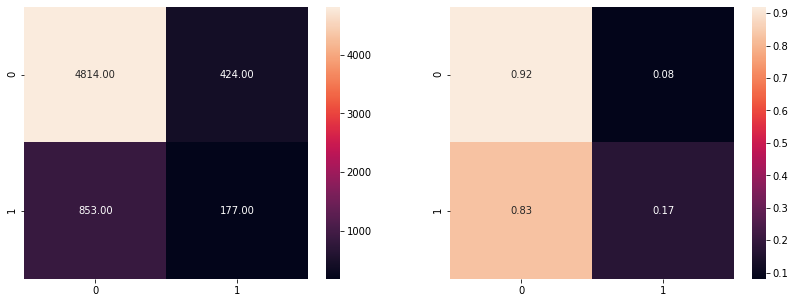

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_predT = modeloClasificador.predict(x_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_predT))
sns.heatmap(confusion_matrix(y_train, y_predT), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_train, y_predT, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_train, y_predT))

In [ ]:
#@title Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup
CATEGORY  =  "gender" #@param {type:"string"}
SUBGROUP =  "Male" #@param {type:"string"}

# Labels for annotating axes in plot.
classes = ['1', '0']

# Given define subgroup, generate predictions and obtain its corresponding 
# ground truth.
subgroup_filter  = test_df.loc[test_df[CATEGORY] == SUBGROUP]
features, labels = pandas_to_numpy(subgroup_filter)
subgroup_results = model.evaluate(x=features, y=labels, verbose=0)
confusion_matrix = np.array([[subgroup_results[1], subgroup_results[4]], 
                             [subgroup_results[2], subgroup_results[3]]])

subgroup_performance_metrics = {
    'ACCURACY': subgroup_results[5],
    'PRECISION': subgroup_results[6], 
    'RECALL': subgroup_results[7],
    'AUC': subgroup_results[8]
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=[SUBGROUP])
pd.options.display.float_format = '{:,.4f}'.format

plot_confusion_matrix(confusion_matrix, classes, SUBGROUP);
performance_df